**In this analysis, game data from a total of 2559 regular season NFL games covering a span of ten years from 2010-2019 is considered, obtained from http://pro-football-reference.com. The aim of this regression analysis is to predict the total points in a given NFL contest based on game conditions and statistics from the participating teams averaged over the previous six games. Only contests taking place from the seventh week of the season to the last week of the regular season are considered for prediction, totalling 1734 games. A description of the features used in this analysis follows.**

**Descriptive Features** - Used solely to describe the contest in question
 * Home_Team - The name of the home team in the contest
 * Vis_Team - The name of the visiting team in the contest
 * H_Game - The number of points scored by the home team in the contest
 * V_Game - The number of points scored by the visiting team in the contest
 
**Analytical Features** - Features used in analysis
 * Tot_Pts - Total Points of the contest. **This is our target variable.**
 * Over/Under - The predicted total points of the contest from professional bookmakers.
 
*Averaged Features* - Statistics averaged over previous five contests. In the columns, prefix "H_" stands for Home Team and "V_" stands for Visiting Team
 * Pts - Points scored
 * Pts_Opp - Points scored by opponent
 * Off_Pass - Offensive passing yards
 * Pass_Metric - Average of offensive passing rank (32 - best, 1 - worst) and defensive passing rank of opponent (1 - best, 32 - worst)
 * Off_Rush - Offensive rushing yards
 * Rush_Metric - Average of offensive rushing rank and defensive rushing rank of opponent
 * Def_Pass - Passing yards given up on defensive
 * Def_Rush - Rushing yards given up on defensive
 * TD - Touchdowns scored
 * TD_on_Def - Touchdowns scored by defense
 * FG_Pct - Percentage of field goals made vs. field goals attempted
 * RZ_Pct - Percentage of red zone possessions resulting in a touchdown (red zone possession is possession reaching opponent's 20 yard line)
 * Def_RZ_Pct - Defensive percentage of red zone possessions giving up a touchdown
 * Poss - Time of possession
 * Plays - Total number of plays
 * TO_Gain - Number of turnovers gained by defense
 * TO_Lost - Number of turnovers lost by offense
 * Yds_Pen - Number of yards penalized
 * Sacks_Def - Sacks earned by defense
 * Tackles_Loss - Number of tackles for loss earned by defense
 * Kickret - Return yards from kickoff
 * Puntret - Return yards from punt
 
*Game Conditions* - Conditions of the contest in question
 * Temperature - Temperature of the contest at kickoff
 * surface - The surface on which the contest was played

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set(font_scale=1.4)

In [4]:
teams = {'Atlanta Falcons':'atl','Buffalo Bills':'buf','Carolina Panthers':'car','Chicago Bears':'chi',
         'Cincinnati Bengals':'cin','Cleveland Browns':'cle','Indianapolis Colts':'clt',
         'Arizona Cardinals':'crd','Dallas Cowboys':'dal','Denver Broncos':'den','Detroit Lions':'det',
         'Green Bay Packers':'gnb','Houston Texans':'htx','Jacksonville Jaguars':'jax',
         'Kansas City Chiefs':'kan','Miami Dolphins':'mia','Minnesota Vikings':'min','New Orleans Saints':'nor',
         'New England Patriots':'nwe','New York Giants':'nyg','New York Jets':'nyj','Tennessee Titans':'oti',
         'Philadelphia Eagles':'phi','Pittsburgh Steelers':'pit','Oakland Raiders':'rai',
         'Las Vegas Raiders':'rai','St. Louis Rams':'ram','Los Angeles Rams':'ram','Baltimore Ravens':'rav',
         'San Diego Chargers':'sdg','Los Angeles Chargers':'sdg','Seattle Seahawks':'sea',
         'San Francisco 49ers':'sfo','Tampa Bay Buccaneers':'tam','Washington Redskins':'was'}

In [544]:
num = 6 # number of games averaged over

In [326]:
def combine_dummies(df, name, combine_cols):
    for col in combine_cols:
        ind=df[df[col]==1].index
        df.loc[ind,name] = col
        df.drop(col,axis=1,inplace=True)
    return df

In [55]:
path = 'data/df_raw.pkl'
with open(path,'rb') as f:
    dfall = pickle.load(f)
dfall

Home/Away              Opponent Points Points_Opp  \
Team Code                                                             
phi  201009120phi         H     Green Bay Packers     20         27   
     201009190det         A         Detroit Lions     35         32   
     201009260jax         A  Jacksonville Jaguars     28          3   
     201010030phi         H   Washington Redskins     12         17   
     201010100sfo         A   San Francisco 49ers     27         24   
...                     ...                   ...    ...        ...   
was  201912010car         A     Carolina Panthers     29         21   
     201912080gnb         A     Green Bay Packers     15         20   
     201912150was         H   Philadelphia Eagles     27         37   
     201912220was         H       New York Giants     35         41   
     201912290dal         A        Dallas Cowboys     16         47   

                  Yds_Off_Pass Yds_Off_Rush Yds_Def_Pass Yds_Def_Rush TD  \
Team Code                                                                  
phi  201009120phi          199          149          188          132  2   
     201009190det          284          162          335          115  5   
     201009260jax          291          106          105          139  4   
     201010030phi          250          110          125          169  1   
     201010100sfo          253          125          309           74  3   
...                        ...          ...          ...          ... ..   
was  201912010car          147          248          278           65  3   
     201912080gnb          170          121          195          174  2   
     201912150was          261          101          266          157  3   
     201912220was          302           80          352          206  5   
     201912290dal          206           88          303          223  1   

                  TD_on_Def  ... RZ_Def_Att Possession Plays TO_Gained  \
Team Code                    ...                                         
phi  201009120phi         0  ...          2  28.083333    62         2   
     201009190det         0  ...          4  30.866667    68         2   
     201009260jax         0  ...          2  27.116667    55         1   
     201010030phi         0  ...          2  32.950000    70         1   
     201010100sfo         1  ...          3  30.800000    65         5   
...                     ...  ...        ...        ...   ...       ...   
was  201912010car         0  ...          4  30.616667    61         2   
     201912080gnb         0  ...          5  29.600000    60         1   
     201912150was         0  ...          5  23.050000    53         1   
     201912220was         0  ...          3  33.800000    64         0   
     201912290dal         0  ...          3  25.750000    62         1   

                  TO_Lost Yds_Pen  Sacks_Def Tackles_Loss Yds_per_Kickret  \
Team Code                                                                   
phi  201009120phi       1      80        3.0            6       23.250000   
     201009190det       0      75        2.0           10       21.800000   
     201009260jax       0      84        7.0            2       16.750000   
     201010030phi       2      80        1.0            2       12.000000   
     201010100sfo       1      30        2.0            5       25.200000   
...                   ...     ...        ...          ...             ...   
was  201912010car       0      65        7.0            5       16.000000   
     201912080gnb       1      25        4.0            6        0.000000   
     201912150was       1      60        2.0            3       29.666667   
     201912220was       0      51        1.0            6       25.000000   
     201912290dal       2      10        3.0            7       28.500000   

                  Yds_per_Puntret  
Team Code                          
phi  201009120phi        7.000000  
     201009190det       11.33333

In [1282]:
path = 'data/df_working'+str(num)+'.pkl'
with open(path, 'rb') as f:
    dfgame = pickle.load(f)

In [1283]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

X_show = dfgame.copy(deep=False)
y = np.ravel(dfgame['Tot_Pts'])
X = dfgame.drop(['Tot_Pts','Over/Under','Home_Team','Vis_Team','H_Game','V_Game'],axis=1)
# 70% split for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio, random_state = 77)
# 15%, 15% split for validation, test data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size = test_ratio/(test_ratio + validation_ratio))
X_show = X_show.loc[X_train.index]

In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

**The barplot demonstrates the quantized nature of football scoring. The significant advantage of the home team is indicated in the scoring as well as in the pie chart.** 

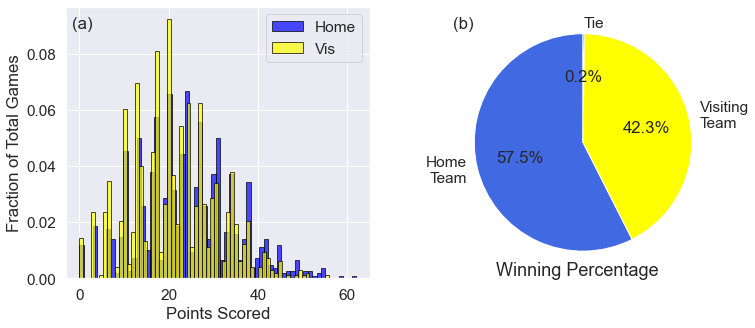

In [551]:
scores = X_show[['H_Game','V_Game']].rename({'H_Game':'Home','V_Game':'Vis'},axis=1)
fig1 = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
_ = plt.xlabel('Points Scored')
_ = plt.ylabel('Fraction of Total Games')
_ = plt.hist(scores['Home'],bins=63,density=True,color='blue',ec='black',alpha=0.7,
         label='Home')
_ = plt.hist(scores['Vis'],bins=63,density=True,color='yellow',ec='black',alpha=0.7,
         label='Vis')
_ = plt.legend(loc='upper right')
ax1.text(0.02,0.92,'(a)',transform=ax1.transAxes)
ax2 = plt.subplot(1,2,2)
win = np.array([(scores['Home'] > scores['Vis']).sum(),(scores['Home'] < scores['Vis']).sum(),
                 (scores['Home'] == scores['Vis']).sum()])
labels = 'Home'+'\n'+'Team', 'Visiting'+'\n'+'Team', 'Tie'
colors = ('royalblue','yellow','black')
_ = plt.pie(win/sum(win),labels=labels,autopct='%1.1f%%',radius=1.0,colors=colors,startangle=90)
_ = plt.text(0.18,0.01,'Winning Percentage',transform=ax2.transAxes,fontsize=18)
ax2.text(0.02,0.92,'(b)',transform=ax2.transAxes)
fig1.show()
fig1.savefig('plots/fig1.png',bbox_inches='tight')

**We can see the range of total score is much larger than that of the Over/Under (3X) with a positive correlation of 0.28.**

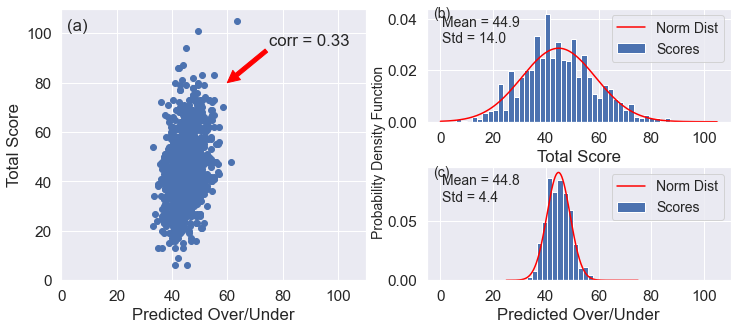

In [555]:
import matplotlib.gridspec as gridspec
from scipy import stats   

fig2 = plt.figure(figsize=(12,5))
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)

inner_l = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
ax = plt.Subplot(fig2, inner_l[0])
#sns.lmplot(x='Over/Under',y='Tot_Pts',data=X_show)
ax.scatter(X_show['Over/Under'],X_show['Tot_Pts'])
ax.set_xlim((0,110))
ax.set_ylim((0,110))
ax.set_xlabel('Predicted Over/Under')
ax.set_ylabel('Total Score')
ax.annotate('corr = 0.33',xy=(60,80),xytext=(75,95),arrowprops={'color':'red'})
ax.text(0.02,0.92,'(a)',transform=ax.transAxes)

fig2.add_subplot(ax)

inner_r = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[1],hspace=0.4)
j=0
mu = np.mean(X_show['Tot_Pts'])
sig = np.std(X_show['Tot_Pts'])
ax0 = plt.Subplot(fig2, inner_r[j])
ax0.set_xlabel('Total Score')
ax0.hist(X_show['Tot_Pts'],bins=50,density=True,label='Scores')
xx = np.linspace(0,105,1000)
yy = stats.norm.pdf(xx,loc=mu,scale=sig)
ax0.plot(xx,yy,color='red',label='Norm Dist')
ax0.legend(loc='upper right',fontsize='small')
ax0.text(0.05,0.7,'Mean = {0:.1f}\nStd = {1:.1f}'.format(mu,sig),transform=ax0.transAxes,fontsize='small')
ax0.text(0.02,0.92,'(b)',transform=ax0.transAxes,fontsize='small')
fig2.add_subplot(ax0)
j=1
mu = np.mean(X_show['Over/Under'])
sig = np.std(X_show['Over/Under'])
ax1 = plt.Subplot(fig2, inner_r[j], sharex=ax0)
ax1.hist(X_show['Over/Under'],bins=16,density=True,label='Scores')
xx = np.linspace(25,75,500)
yy = stats.norm.pdf(xx,loc=np.mean(X_show['Over/Under']),scale=np.std(X_show['Over/Under']))
ax1.plot(xx,yy,color='red',label='Norm Dist')
ax1.legend(loc='upper right',fontsize='small')
ax1.text(0.05,0.7,'Mean = {0:.1f}\nStd = {1:.1f}'.format(mu,sig),transform=ax1.transAxes,fontsize='small')
ax1.text(0.02,0.92,'(c)',transform=ax1.transAxes,fontsize='small')
fig2.add_subplot(ax1)
fig2.text(0.485,0.25,'Probability Density Function',fontsize=14,rotation='vertical')
ax1.set_xlabel('Predicted Over/Under')
fig2.show()
fig2.savefig('plots/fig2.png',bbox_inches='tight')

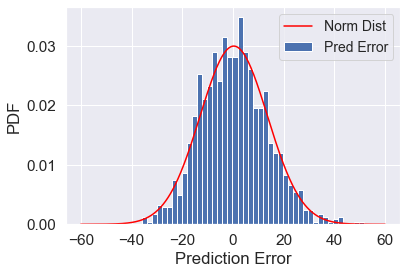

In [556]:
mu = np.mean(error)
sig = np.std(error)
xx = np.linspace(-60,60,500)
yy = stats.norm.pdf(xx,loc=mu,scale=sig)
fig3 = plt.figure()
_ = fig3.add_subplot(1,1,1)
_ = plt.xlabel('Prediction Error')
_ = plt.ylabel('PDF')
_ = plt.hist(error,bins=44,density=True,label='Pred Error')
_ = plt.plot(xx,yy,color='red',label='Norm Dist')
_ = plt.legend(loc='upper right',fontsize='small')
fig3.show()
fig3.savefig('plots/fig3.png',bbox_inches='tight')

**This boxplot shows the symmetry of the error data around 0 and the larger number of positive outliers in the Over/Under prediction error.** 

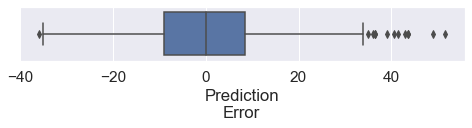

In [557]:
fig4 = plt.figure(figsize=(8,1))
error = pd.Series(error,name='Prediction'+'\n'+'Error')
_ = sns.boxplot(error, orient='h')
fig4.show()
fig4.savefig('plots/fig4.png',bbox_inches='tight')

**There is remarkable symmetry in the Over/Under prediction error, as well as in the Over vs. Under wins. This symmetry is also revealed in the median error, although a greater number of outliers to the upside is reflected in the average error.** 

The median and average errors for the Over are 9.2 and 11.3 points
The median and average errors for the Under are -9.0 and -10.2 points


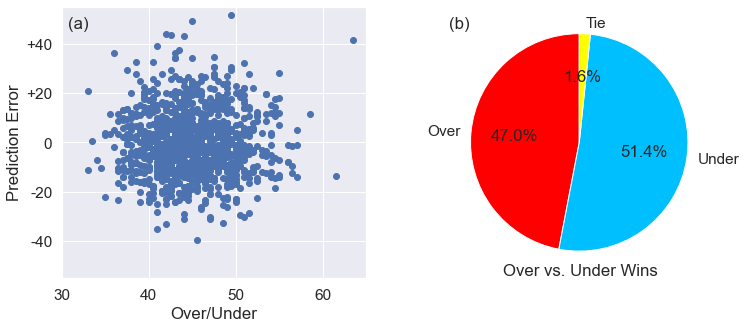

In [558]:
import matplotlib.ticker as tick
fig5, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5)) 
error = X_show['Tot_Pts'] - X_show['Over/Under']
ax1.set_ylim(-55,55)
ax1.set_xlim(30,65)
ax1.set_xlabel('Over/Under')
ax1.set_ylabel('Prediction Error')
ax1.scatter(X_show['Over/Under'],error)
def y_tk_fmt(x,y):
    if x > 0:
        return '{:+d}'.format(int(x))
    else:
        return '{:d}'.format(int(x))
ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_tk_fmt))
ax1.text(0.02,0.92,'(a)',transform=ax1.transAxes,fontsize='medium')
o_u = np.array([(X_show['Tot_Pts'] > X_show['Over/Under']).sum(),
                (X_show['Tot_Pts'] < X_show['Over/Under']).sum(),
                 (X_show['Tot_Pts'] == X_show['Over/Under']).sum()])
labels = 'Over','Under','Tie'
colors = ('red','deepskyblue','yellow')
ax2.pie(o_u/sum(o_u),labels=labels,autopct='%1.1f%%',radius=1.0,colors=colors,
        startangle=90)
ax2.text(0.22,0.01,'Over vs. Under Wins',transform=ax2.transAxes)
ax2.text(0.02,0.92,'(b)',transform=ax2.transAxes,fontsize='medium')
fig5.show()
fig5.savefig('plots/fig5.png',bbox_inches='tight')
import statistics
pos = error[error > 0]
neg = error[error < 0]
print('The median and average errors for the Over are {0:.1f} and {1:.1f} points'
      .format(pos.median(),pos.mean()))
print('The median and average errors for the Under are {0:.1f} and {1:.1f} points'
      .format(neg.median(),neg.mean()))

In [559]:
Q3=error.quantile(0.75)
Q1=error.quantile(0.25)
IQR = Q3-Q1
outliers = X_show.loc[error > 1.5*IQR,:]
outlier_year = pd.Series([int(x[0:4]) for x in outliers.index])
year_counts = outlier_year.value_counts().sort_index()

In [560]:
# Calculate percentage of 'Overs' by year 
year = pd.DataFrame([int(x[0:4]) for x in X_show.index],index=X_show.index)
year['Over'] = X_show['Tot_Pts'] > X_show['Over/Under']
over_count = year['Over'].groupby(year.iloc[:,0]).mean()

**There is no particular pattern with respect to number of outlier games and the year from the bar chart. Furthermore, the Over winning percentage is not constant by year, as shown in the line plot. However, there does seem to be some correlation between the Over winning percentage and the number of outlier games.** 

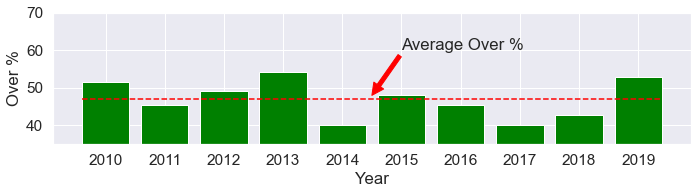

In [563]:
fig6 = plt.figure(figsize=(10,3))
_ = fig6.add_subplot(1,1,1)
_ = plt.xlabel('Year')
_ = plt.ylabel('Over %')
_ = plt.bar(year_counts.index,over_count.values*100,color='green',
       tick_label=[str(i) for i in range(2010,2020)])
_ = plt.ylim(35,70)
_ = plt.hlines(47.0,2009.6,2019.4,linestyle='dashed',colors='red')
_ = plt.annotate('Average Over %',xy=(2014.5,48),xytext=(2015,60),arrowprops={'color':'red'})
#ax2 = ax.twinx()
#ax2.set_ylabel('Number of Outlier Games')
#ax2.plot(over_count.index,over_count.values*100,linewidth=1, color='blue')
fig6.tight_layout()  
fig6.show()
fig6.savefig('plots/fig6.png')

In [177]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

**Examining the upside outlier games further, these games seem to be populated by certain scenarios. Here is a bar plot demonstrating the difference between the mean outlier value and the general mean value as a fraction of the general standard deviation for the categories in our dataset. Games that are poorly predicted to the upside seem to have some of the following characteristics in our dataset:**
 * Home teams having strong pass offenses, particularly those combined with weak visiting pass defenses, as reflected in "H_Pass_Metric" 
 * Home teams with a strong tendency to obtain turnovers
 * Home teams with high red zone percentages against teams with low red zone percentages
 * Visiting teams with penchant for incurring penalties

**The following correlation matrix reveals that there seems to be a much greater correlation between the scoring history of the teams and the predicted over/under (0.45,0.46) than between the scoring history and the actual total score of the predicted game (0.14,0.13). In addition, there is little to no correlation between the opposing teams' scores of the last five games and the total score of the game in question (0.00,0.05). Also revealed is that there is significant correlation between red zone percentage and scoring history, as expected, but little correlation with scoring history and field goal percentage. The importance of red zone percentage is reflected in the over/under prediction, but less so in the actual total score.**

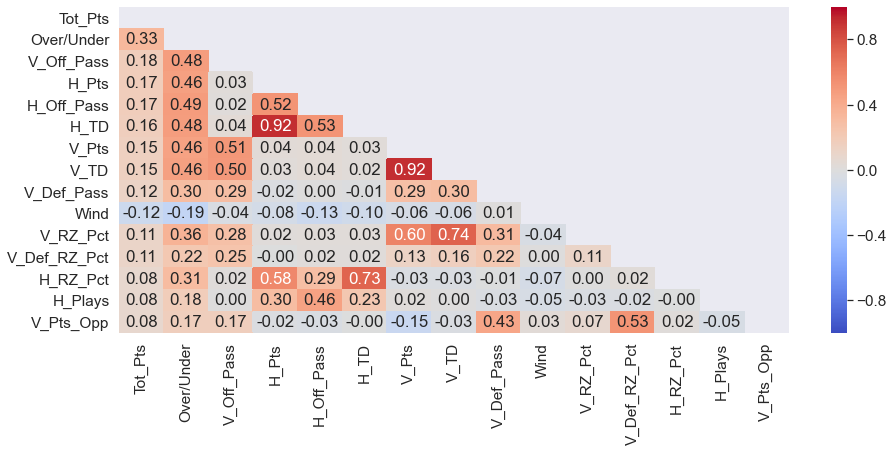

In [570]:
fig7 = plt.figure(figsize=(15,6))
ax = fig7.add_subplot(1,1,1)

cols = X_show.columns.drop(['Home_Team','Vis_Team','H_Game','V_Game'])
cols = cols.drop(['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf'])
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))]

Top = X_show[newcols[0:15]]
mask = np.triu(Top.corr())
sns.set(font_scale=1.4)
sns.heatmap(Top.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
#_ = plt.text(0.95,0.92,'(a)',transform=ax.transAxes,fontsize='medium')
fig7.show()
fig7.savefig('plots/fig7.png')

In [456]:
X_show['Tot_Pts'].corr(X_show['H_Def_RZ_Pct'])

0.051472387657170736

In [457]:
X_show['Over/Under'].corr(X_show['H_Def_RZ_Pct'])

0.20440976755338705

In [542]:
X_show = X_show.drop(['H_TD','V_TD'],axis=1)

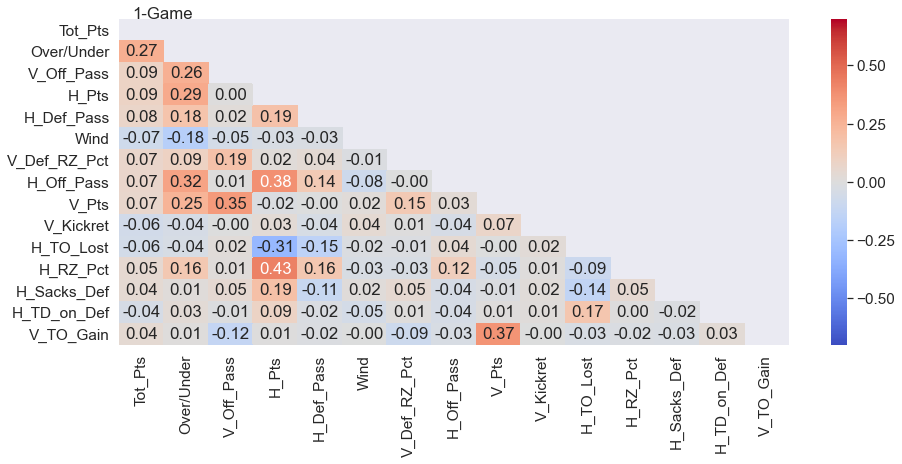

In [543]:
fig8 = plt.figure(figsize=(15,6))
ax = fig8.add_subplot(1,1,1)

cols = X_show.columns.drop(['Home_Team','Vis_Team','H_Game','V_Game'])
cols = cols.drop(['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf'])
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))]

Top = X_show[newcols[0:15]]
mask = np.triu(Top.corr())
sns.set(font_scale=1.4)
sns.heatmap(Top.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
_ = plt.text(0.02,1.00,str(num)+'-Game',transform=ax.transAxes)
fig8.show()
file = 'plots/fig8_'+str(num)+'.png'
fig8.savefig(file)

In [1080]:
X_show[X_show['Humidity'] > 0].Temperature.min()

-8.60381222818219

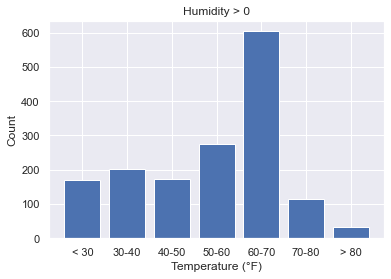

In [1086]:
bins = [-10,30,40,50,60,70,80,100]
grouped = X_show.groupby(pd.cut(X_show.Temperature,bins))
ind = np.arange(len(grouped['Temperature'].count()))
_ = plt.bar(ind,grouped['Temperature'].count().values)
_ = plt.xticks(ind,labels=('< 30','30-40','40-50','50-60','60-70','70-80','> 80'))
_ = plt.xlabel('Temperature (°F)')
_ = plt.ylabel('Count')
_ = plt.title('Humidity > 0')
plt.show()

In [1082]:
len(X_show[((X_show['Humidity']>0) & (X_show['Temperature']>78))])

35

In [1084]:
X_show[X_show['Humidity']>0].Temperature.max()

87.0

In [1085]:
X_show['Tot_Pts'].corr(X_show['Humidity'])

-0.03779842797685108

In [1087]:
X_show[X_show['Humidity']>0]['Tot_Pts'].corr(X_show['Humidity'])

-0.035195131739074556

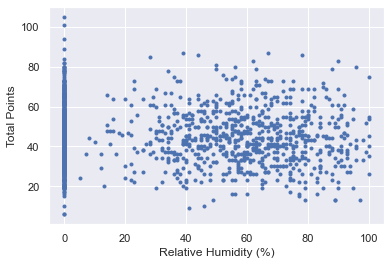

In [1089]:
_ = plt.plot(X_show['Humidity'],X_show['Tot_Pts'],marker='.',linestyle='None')
_ = plt.xlabel('Relative Humidity (%)')
_ = plt.ylabel('Total Points')
plt.show()

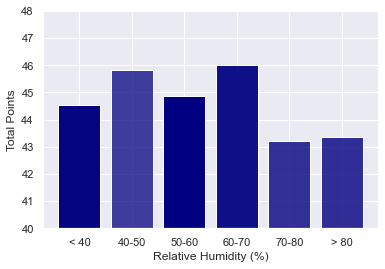

In [1105]:
bins = [0,40,50,60,70,80,100]
grouped = X_show.groupby(pd.cut(X_show.Humidity,bins))
counts = grouped['Tot_Pts'].count().values
alp = counts/max(counts)
colors = [(0,0,0.5,alp[a]) for a in range(len(alp))]
ind = np.arange(len(grouped['Humidity'].mean()))
_ = plt.bar(ind,grouped['Tot_Pts'].mean().values,color=colors)
_ = plt.xticks(ind,labels=('< 40','40-50','50-60','60-70','70-80','> 80'))
_ = plt.ylim(40,48)
_ = plt.xlabel('Relative Humidity (%)')
_ = plt.ylabel('Total Points')
plt.show()

In [1106]:
grouped['Tot_Pts'].count()

Humidity
(0, 40]      140
(40, 50]     106
(50, 60]     143
(60, 70]     134
(70, 80]     114
(80, 100]    115
Name: Tot_Pts, dtype: int64

In [396]:
X_show['Tot_Pts'].corr(X_show['Temperature'])

0.06450947290353899

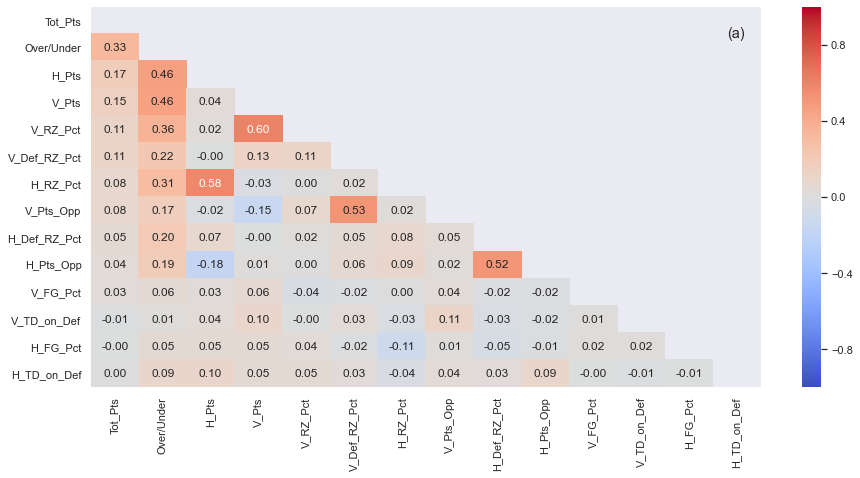

In [618]:
fig9a = plt.figure(figsize=(15,7))
ax = fig9a.add_subplot(1,1,1)

cols=['Over/Under','Tot_Pts','H_Pts','H_Pts_Opp','V_Pts','V_Pts_Opp','H_TD_on_Def','V_TD_on_Def',
      'H_RZ_Pct','V_RZ_Pct','H_Def_RZ_Pct','V_Def_RZ_Pct','H_FG_Pct','V_FG_Pct']
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))] 

Points = X_show[newcols]
mask = np.triu(Points.corr())
sns.heatmap(Points.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
_ = plt.text(0.95,0.92,'(a)',transform=ax.transAxes,fontsize='large')
fig9a.show()
fig9a.savefig('plots/fig9a.png')

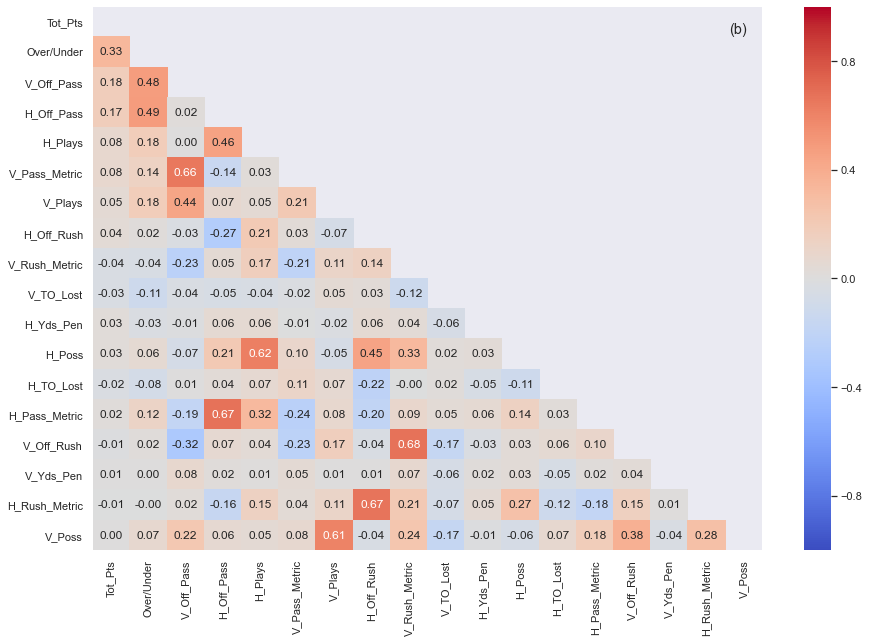

In [617]:
fig9b = plt.figure(figsize=(15,10))
ax = fig9b.add_subplot(1,1,1)

cols=['Over/Under','Tot_Pts','H_Off_Pass','H_Pass_Metric','V_Off_Pass',
              'V_Pass_Metric','H_Off_Rush','H_Rush_Metric','V_Off_Rush',
              'V_Rush_Metric','H_TO_Lost','V_TO_Lost','H_Yds_Pen','V_Yds_Pen',
              'H_Poss','V_Poss','H_Plays','V_Plays']
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))] 

Ostats=X_show[newcols]
mask = np.triu(Ostats.corr())
sns.heatmap(Ostats.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
_ = plt.text(0.95,0.95,'(b)',transform=ax.transAxes,fontsize='large')
fig9b.show()
fig9b.savefig('plots/fig9b.png')

In [370]:
X_show['H_Pts'].corr(X_show['H_Pass_Metric'])

0.3432109770983537

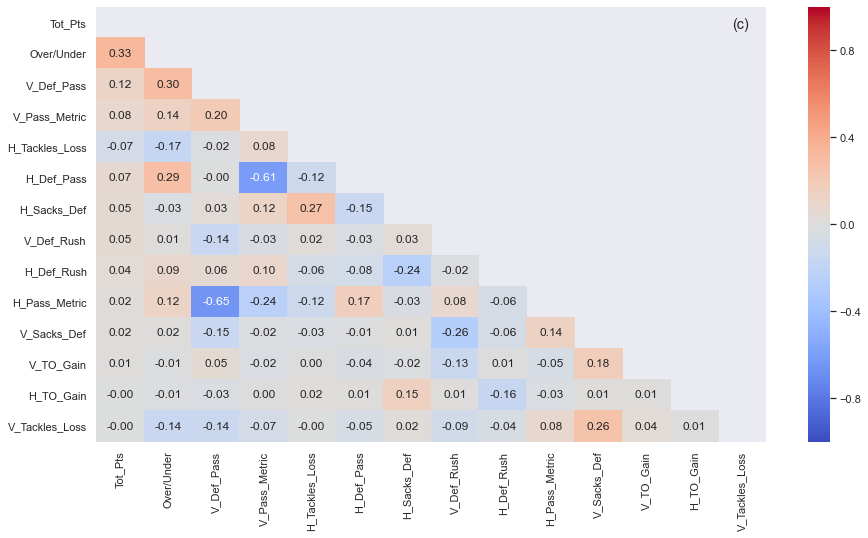

In [613]:
fig9c = plt.figure(figsize=(15,8))
ax = fig9c.add_subplot(1,1,1)

cols=['Over/Under','Tot_Pts','H_Def_Pass','V_Def_Pass','H_Def_Rush','V_Def_Rush','H_Pass_Metric','V_Pass_Metric',
      'H_TO_Gain','V_TO_Gain','H_Sacks_Def','V_Sacks_Def','H_Tackles_Loss','V_Tackles_Loss']
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))] 

Dstats=X_show[newcols]
mask = np.triu(Dstats.corr())
sns.set(font_scale=1.0)
sns.heatmap(Dstats.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
_ = plt.text(0.95,0.95,'(c)',transform=ax.transAxes,fontsize='large')
fig9c.show()
fig9c.savefig('plots/fig9c.png')

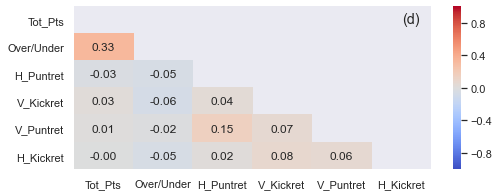

In [615]:
fig9d = plt.figure(figsize=(8,3))
ax = fig9d.add_subplot(1,1,1)

cols=['Tot_Pts','Over/Under','H_Kickret','V_Kickret',
              'H_Puntret','V_Puntret']
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))] 

Sstats=X_show[newcols]
mask = np.triu(Sstats.corr())
sns.heatmap(Sstats.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
_ = plt.text(0.92,0.90,'(d)',transform=ax.transAxes,fontsize='large')
fig9d.show()
fig9d.savefig('plots/fig9d.png')

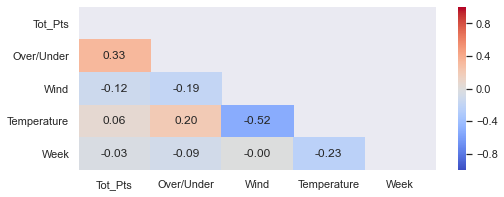

In [635]:
fig10 = plt.figure(figsize=(8,3))
ax = fig10.add_subplot(1,1,1)

cols=['Tot_Pts','Over/Under','Temperature','Wind','Week']
corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
sortcorr = sorted(corrs,reverse=True)
mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
newcols = [cols[mapa[ind]] for ind in range(len(cols))] 

Gstats=X_show[newcols]
mask = np.triu(Gstats.corr())

# masks correlations of surface categories with each other
#surfcol=['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']
#for col in surfcol:
#    ind = Gstats.columns.get_loc(col)
#    for i in range(ind+1,len(mask)):
#        mask[i,ind] = mask[ind,i]

sns.heatmap(Gstats.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
#_ = plt.text(0.92,0.90,'(e)',transform=ax.transAxes,fontsize='large')
fig10.show()
fig10.savefig('plots/fig10.png')

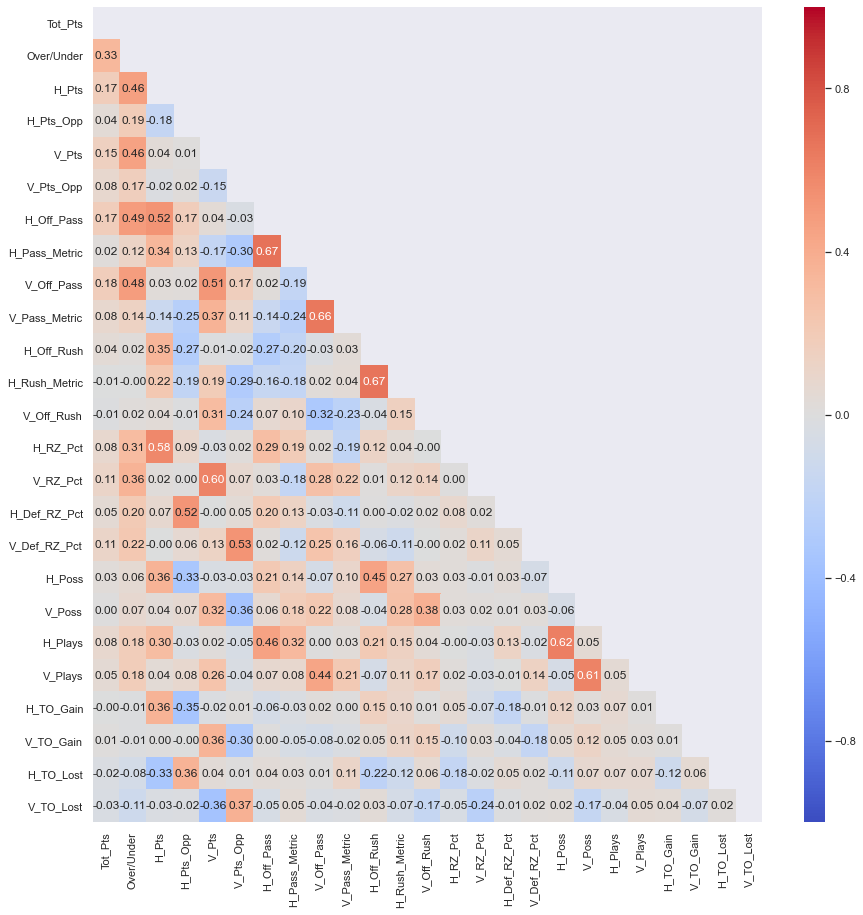

In [864]:
fig9 = plt.figure(figsize=(15,15))
ax = fig9.add_subplot(1,1,1)

dropped = ['Home_Team','Vis_Team','H_Game','V_Game','H_TD','V_TD','a_turf','astroplay','astroturf',
           'fieldturf','grass','matrixturf','sportturf']
                 
cols=X_show.columns.drop(dropped)
#corrs = [np.abs(X_show['Tot_Pts'].corr(X_show[col])) for col in cols]
#sortcorr = sorted(corrs,reverse=True)
#mapa = {ind:corrs.index(value) for ind,value in enumerate(sortcorr)}
#newcols = [cols[mapa[ind]] for ind in range(len(cols))] 

Stats=X_show[cols]
coeffs = Stats.corr()
moretodrop = []
for col in cols:
    max_coef = coeffs.loc[col,np.abs(coeffs.loc[col]).rank(ascending=False) == 2].values[0] # neglect self-correlation
    if max_coef < 0.3: moretodrop.append(col)
coeffs = coeffs.drop(moretodrop).drop(moretodrop,axis=1)
mask = np.triu(coeffs)
sns.set(font_scale=1.0)
sns.heatmap(coeffs,vmin=-1.0,center=0,vmax=1.0,mask=mask,
            annot=True,cmap='coolwarm',cbar_kws={'aspect':40},fmt='.2f')
fig9.show()
fig9.savefig('plots/fig9.png')

In [1248]:
reg_score=np.empty(7)
for n in range(1,8):
    path = 'data/df_working'+str(n)+'.pkl'
    with open(path,'rb') as f:
        dfgame = pickle.load(f)
    yy = np.ravel(dfgame['Tot_Pts'])
    XX = dfgame.drop(['Tot_Pts','Over/Under','Home_Team','Vis_Team','H_Game','V_Game'],axis=1)
    XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 1-train_ratio, random_state=77)
    LR = linear_model.LinearRegression()
    LR.fit(XX_train,yy_train)
    reg_score[n-1] = LR.score(XX_train,yy_train)

array([0.06721829, 0.08425405, 0.10384167, 0.11490953, 0.10571698,
       0.13175059, 0.12349258])

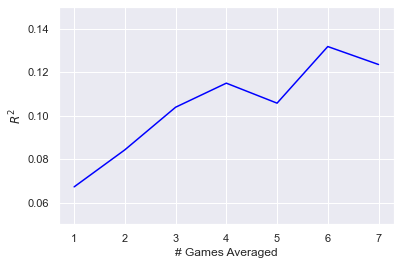

In [1254]:
fig = plt.figure()
_ = fig.add_subplot(1,1,1)
_ = plt.xlabel('# Games Averaged')
_ = plt.ylabel(r'$R^2$')
_ = plt.ylim(0.05,0.15)
_ = plt.plot(np.arange(1,len(reg_score)+1),reg_score,color='blue')
fig.show()

In [1271]:
a=np.exp(0.05*np.arange(4))
print(a/np.sum(a))

[0.23157388 0.24344693 0.25592872 0.26905047]


In [ ]:
def normalize_weights(a,n):
    arr = np.exp(a*np.arange(n))
    return arr/np.sum(arr)

In [ ]:
weights = np.empty(num)
for factor in range(0.5,7.5,0.5):
    weights = 

In [1272]:
a = np.arange(0.5,7.5,0.5)

In [904]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
X1 = X_train[['Over/Under']]
fit1=LR.fit(X1,y_train)
print(fit1.score(X1,y_train))

0.10773506272129842


In [905]:
X2 = X_train[['Over/Under','H_Off_Pass','H_Pts','V_Off_Pass','V_Pts']]
fit2=LR.fit(X2,y_train)
print(fit2.score(X2,y_train))

0.10955271038607917


In [912]:
X3 = X_train[['Over/Under','H_Off_Pass','H_Pts','V_Off_Pass','V_Pts','V_RZ_Pct','V_Def_RZ_Pct','H_RZ_Pct',
             'V_Pts_Opp','V_Pass_Metric','H_Tackles_Loss','H_Plays','V_Def_Pass']]
fit3=LR.fit(X3,y_train)
print(fit3.score(X3,y_train))

0.11356885572847675


In [913]:
X4 = X_train[['Over/Under','H_Off_Pass','H_Pts','V_Off_Pass','V_Pts','V_RZ_Pct','V_Def_RZ_Pct','H_RZ_Pct',
             'V_Pts_Opp','V_Pass_Metric','H_Tackles_Loss','H_Plays','V_Def_Pass','Wind']]
fit4=LR.fit(X4,y_train)
print(fit4.score(X4,y_train))

0.11824722424028945


In [926]:
X5 = X_train[['Over/Under','H_Off_Pass','H_Pts','V_Off_Pass','V_Pts','V_RZ_Pct','V_Def_RZ_Pct','H_RZ_Pct',
             'V_Pts_Opp','V_Pass_Metric','H_Tackles_Loss','H_Plays','V_Def_Pass','Wind','H_Def_RZ_Pct',
             'H_Pts_Opp','H_Pass_Metric','V_Tackles_Loss','V_Plays','H_Def_Pass','H_Off_Rush','V_Off_Rush',
             'H_Rush_Metric','V_Rush_Metric']]
fit5=LR.fit(X5,y_train)
print(fit5.score(X5,y_train))

0.1259774415534124


In [927]:
X6 = pd.concat([X5,X_train[['H_Def_Rush','V_Def_Rush','H_TO_Gain','V_TO_Gain','H_Sacks_Def','V_Sacks_Def',
                           'H_Poss','V_Poss','H_TO_Lost','V_TO_Lost','H_TD_on_Def','V_TD_on_Def']]],axis=1)
fit6=LR.fit(X6,y_train)
print(fit6.score(X6,y_train))

0.136479800683877


In [930]:
X7 = pd.concat([X6,X_train[['H_Puntret','V_Puntret','H_Kickret','V_Kickret','H_FG_Pct','V_FG_Pct',
                           'H_Yds_Pen','V_Yds_Pen']]],axis=1)
fit7=LR.fit(X7,y_train)
print(fit7.score(X7,y_train))

0.1451794448069108


In [933]:
X8 = pd.concat([X7,X_train[['Temperature','Week']]],axis=1)
fit8=LR.fit(X8,y_train)
print(fit8.score(X8,y_train))

0.14543521158839912


In [934]:
X9 = pd.concat([X8,X_train[['a_turf','astroplay','astroturf','fieldturf','grass',
                            'matrixturf','sportturf']]],axis=1)
fit9=LR.fit(X9,y_train)
print(fit9.score(X9,y_train))

0.14915943015424948


In [938]:
fitt = LR.fit(X_train,y_train)
fitt.score(X_train,y_train)

0.14915943015424948

In [1127]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard = StandardScaler()
minmax = MinMaxScaler()
standX = standard.fit_transform(X_train.drop('astroturf',axis=1))
minmaxX = minmax.fit_transform(X_train.drop('astroturf',axis=1))

In [1128]:
s_scalefit = LR.fit(standX,y_train)
s_scalefit.score(standX,y_train)

0.1483286979613443

In [1129]:
coef = pd.DataFrame(abs(LR.coef_), X_train.drop('astroturf',axis=1).columns, columns=['LR Coefficient'])
print(coef.sort_values('LR Coefficient',ascending=False))

                LR Coefficient
Over/Under            3.478065
V_Def_Rush            1.809451
V_Off_Pass            1.519665
Wind                  1.320427
V_Pass_Metric         1.159711
H_Pts                 1.151711
H_Sacks_Def           1.052358
H_Pass_Metric         0.981866
V_Pts_Opp             0.912753
H_Def_Pass            0.904192
V_Def_RZ_Pct          0.855182
V_Kickret             0.815231
H_Off_Pass            0.761754
H_Yds_Pen             0.756845
V_Tackles_Loss        0.750569
H_RZ_Pct              0.741703
H_TD_on_Def           0.714379
H_Poss                0.693194
astroplay             0.635621
H_Def_Rush            0.635125
H_Rush_Metric         0.588819
H_Plays               0.573441
matrixturf            0.534591
H_FG_Pct              0.513879
V_TO_Lost             0.476381
V_Def_Pass            0.432907
V_Puntret             0.384988
V_TD_on_Def           0.372004
V_RZ_Pct              0.353023
V_Sacks_Def           0.349479
Humidity              0.328976
H_Tackle

In [1130]:
m_scalefit = LR.fit(minmaxX,y_train)
m_scalefit.score(minmaxX,y_train)

0.1483286979613443

In [1132]:
coef = pd.DataFrame(abs(LR.coef_), X_train.drop('astroturf',axis=1).columns, columns=['LR Coefficient'])
print(coef.sort_values('LR Coefficient',ascending=False))

                LR Coefficient
Over/Under           24.107577
Wind                 14.893054
V_Def_Rush           13.098342
V_Off_Pass            9.516627
H_Pts                 7.232671
H_Sacks_Def           6.425871
H_RZ_Pct              5.885610
H_Def_Pass            5.847252
V_Pass_Metric         5.573622
V_Kickret             5.556378
V_Def_RZ_Pct          5.535509
V_Pts_Opp             5.241911
V_Tackles_Loss        5.098323
H_Yds_Pen             4.878810
H_Pass_Metric         4.532445
H_Plays               4.450826
H_Off_Pass            4.430785
H_TD_on_Def           4.333602
astroplay             4.261186
H_Def_Rush            4.204836
H_Poss                4.146540
H_FG_Pct              3.349632
matrixturf            3.227463
V_TO_Lost             3.197579
V_Puntret             2.857839
H_Rush_Metric         2.787234
V_Def_Pass            2.573735
V_RZ_Pct              2.265321
V_TD_on_Def           2.251874
V_Sacks_Def           2.124295
H_Tackles_Loss        2.038949
H_Puntre

In [1133]:
small = X_train[['Over/Under','Wind','V_Def_Rush','H_Off_Pass','H_Pass_Metric','H_Pts','H_Sacks_Def','H_RZ_Pct',
                'V_Kickret','V_Def_RZ_Pct','V_Pts_Opp','H_Yds_Pen','V_Tackles_Loss','H_TD_on_Def','V_Off_Pass',
                 'H_Def_Rush','H_FG_Pct','V_TO_Lost','grass','matrixturf','sportturf','a_turf',
                 'fieldturf','astroplay']]
sm_scaled = standard.fit_transform(small)
sm_fit = LR.fit(sm_scaled,y_train)
sm_fit.score(sm_scaled,y_train)

0.14053097199206233

In [1134]:
coef = pd.DataFrame(abs(LR.coef_), small.columns, columns=['LR Coefficient'])
print(coef.sort_values('LR Coefficient',ascending=False))

                LR Coefficient
Over/Under            3.573925
H_Pass_Metric         1.457394
V_Def_Rush            1.254956
H_Off_Pass            1.106676
Wind                  1.096408
H_Pts                 1.073010
V_Pts_Opp             1.014099
H_Sacks_Def           0.963988
V_Kickret             0.853448
V_Def_RZ_Pct          0.819047
H_Def_Rush            0.817123
H_Yds_Pen             0.789234
H_RZ_Pct              0.778170
V_Tackles_Loss        0.752868
H_TD_on_Def           0.658578
astroplay             0.632070
V_Off_Pass            0.620272
matrixturf            0.542683
H_FG_Pct              0.495060
V_TO_Lost             0.389244
sportturf             0.126179
grass                 0.054357
a_turf                0.054356
fieldturf             0.014841


In [1135]:
scaled = standard.fit_transform(small)
fit = LR.fit(scaled,y_train)
y_pred = LR.predict(scaled)
results1 = pd.DataFrame(y_train,columns=['Actual'],index=X_train.index)
results1['Predicted'] = y_pred
results1['Over/Under'] = X_train['Over/Under']
# Results for small number of features
accuracy1 = (((results1['Actual']>results1['Over/Under']) & (results1['Predicted']>results1['Over/Under'])) | 
 ((results1['Actual']<results1['Over/Under']) & (results1['Predicted']<results1['Over/Under']))).mean()
print(fit.score(scaled,y_train),accuracy1)

0.14053097199206233 0.5510018214936248


In [1143]:
# Results for all features
standX = standard.fit_transform(X_train.drop('astroturf',axis=1))
s_scalefit = LR.fit(standX,y_train)
y_pred = LR.predict(standX)
results2 = pd.DataFrame(y_train,columns=['Actual'],index=X_train.index)
results2['Predicted'] = y_pred
results2['Over/Under'] = X_train['Over/Under']
# Results for small number of features
accuracy2 = ((((results2['Actual']>results2['Over/Under']) & (results2['Predicted']>results2['Over/Under'])) | 
 ((results2['Actual']<results2['Over/Under']) & (results2['Predicted']<results2['Over/Under']))).sum()/
             (results2['Actual']!=results2['Over/Under']).sum())
print(s_scalefit.score(standX,y_train),accuracy2)

0.1483286979613443 0.5611111111111111


In [1144]:
under_yes = ((results2['Actual']<results2['Over/Under']) & (results2['Predicted']<results2['Over/Under'])).sum()
under = (results2['Actual']<results2['Over/Under']).sum()
print(under_yes,under,under_yes/under)

311 564 0.5514184397163121


In [1145]:
over_yes = ((results2['Actual']>results2['Over/Under']) & (results2['Predicted']>results2['Over/Under'])).sum()
over = (results2['Actual']>results2['Over/Under']).sum()
print(over_yes,over,over_yes/over)

295 516 0.5717054263565892


In [1146]:
extr=results2[np.abs(results2['Predicted']-results2['Over/Under']) >= 2.0]
len(extr)/len(results2)

0.4899817850637523

In [1147]:
(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum()/
 (extr['Actual']<extr['Over/Under']).sum())
print(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum(),
      (extr['Actual']<extr['Over/Under']).sum(),(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum()/
 (extr['Actual']<extr['Over/Under']).sum()))

166 276 0.6014492753623188


In [1148]:
(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum()/
(extr['Actual']>extr['Over/Under']).sum())
print(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum(),
     (extr['Actual']>extr['Over/Under']).sum(),(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum()/
(extr['Actual']>extr['Over/Under']).sum()))

161 254 0.6338582677165354


In [1153]:
len(X_test.columns)

54

In [1154]:
dr=X_test.drop('astroturf',axis=1)
stand_test = standard.transform(dr)
s_scalefit = LR.fit(standX,y_train)
y_pred = LR.predict(stand_test)
results3 = pd.DataFrame(y_test,columns=['Actual'],index=X_test.index)
results3['Predicted'] = y_pred
results3['Over/Under'] = X_test['Over/Under']
# Results for small number of features
accuracy3 = ((((results3['Actual']>results3['Over/Under']) & (results3['Predicted']>results3['Over/Under'])) | 
 ((results3['Actual']<results3['Over/Under']) & (results3['Predicted']<results3['Over/Under']))).sum()/
             (results3['Actual']!=results3['Over/Under']).sum())
print(s_scalefit.score(stand_test,y_test),accuracy3)

0.10063754757216016 0.5108225108225108


In [1155]:
extr=results3[np.abs(results3['Predicted']-results3['Over/Under']) >= 3.0]
len(extr)/len(results3)

0.3093220338983051

In [1156]:
(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum()/
 (extr['Actual']<extr['Over/Under']).sum())
print(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum(),
      (extr['Actual']<extr['Over/Under']).sum(),(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum()/
 (extr['Actual']<extr['Over/Under']).sum()))

21 35 0.6


In [1157]:
(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum()/
(extr['Actual']>extr['Over/Under']).sum())
print(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum(),
     (extr['Actual']>extr['Over/Under']).sum(),(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum()/
(extr['Actual']>extr['Over/Under']).sum()))

17 35 0.4857142857142857


In [1124]:
cols=['Wind','V_Def_Rush','H_Off_Pass','H_Pass_Metric','H_Pts','H_Sacks_Def','H_RZ_Pct',
                'V_Kickret','V_Def_RZ_Pct','V_Pts_Opp','H_Yds_Pen','V_Tackles_Loss','H_TD_on_Def','V_Off_Pass',
                 'H_Def_Rush','H_FG_Pct','V_TO_Lost','grass','matrixturf','sportturf','a_turf',
                 'fieldturf','astroplay']

small_train = X_train[cols]
small_test = X_test[cols]
scaled_train = standard.fit_transform(small_train)
scaled_test = standard.transform(small_test)                                
LR.fit(scaled_train,y_train)
#y_pred = LR.predict(scaled_test)
#results10 = pd.DataFrame(y_test,columns=['Actual'],index=X_test.index)
#results10['Over/Under'] = X_test['Over/Under']
y_pred = LR.predict(scaled_train)
results10 = pd.DataFrame(y_train,columns=['Actual'],index=X_train.index)
results10['Over/Under'] = X_train['Over/Under']
results10['Predicted'] = y_pred
# Results for small number of features
accuracy10 = ((((results10['Actual']>results10['Over/Under']) & (results10['Predicted']>results10['Over/Under'])) | 
 ((results10['Actual']<results10['Over/Under']) & (results10['Predicted']<results10['Over/Under']))).sum()/
             (results10['Actual']!=results10['Over/Under']).sum())
print(LR.score(scaled_train,y_train),accuracy10)

0.1145308702961283 0.5638888888888889


In [1125]:
coef = pd.DataFrame(abs(LR.coef_), small_train.columns, columns=['LR Coefficient'])
print(coef.sort_values('LR Coefficient',ascending=False))

                LR Coefficient
H_Off_Pass            2.635257
H_Pts                 2.140616
H_Pass_Metric         2.129602
V_Off_Pass            1.986946
Wind                  1.444731
V_Def_Rush            1.441626
H_Def_Rush            1.287946
V_Def_RZ_Pct          1.013816
V_Pts_Opp             0.872638
matrixturf            0.806129
V_Kickret             0.781540
H_Yds_Pen             0.756889
H_Sacks_Def           0.752050
H_RZ_Pct              0.678299
astroplay             0.617203
H_TD_on_Def           0.595974
V_Tackles_Loss        0.506679
H_FG_Pct              0.423835
sportturf             0.333541
a_turf                0.152395
V_TO_Lost             0.115464
fieldturf             0.090641
grass                 0.033461


In [1284]:
scaled_train = standard.fit_transform(X_train)
scaled_test = standard.transform(X_test)                                
LR.fit(scaled_train,y_train)
#y_pred = LR.predict(scaled_test)
#results15 = pd.DataFrame(y_test,columns=['Actual'],index=X_test.index)
#results15['Over/Under'] = X_test['Over/Under']
y_pred = LR.predict(scaled_train)
results15 = pd.DataFrame(y_train,columns=['Actual'],index=X_train.index)
results15['Over/Under'] = X_show.loc[X_train.index]['Over/Under']
results15['Predicted'] = y_pred
# Results for small number of features
accuracy15 = ((((results15['Actual']>results15['Over/Under']) & (results15['Predicted']>results15['Over/Under'])) | 
 ((results15['Actual']<results15['Over/Under']) & (results15['Predicted']<results15['Over/Under']))).sum()/
             (results15['Actual']!=results15['Over/Under']).sum())
print(LR.score(scaled_train,y_train),accuracy15)

0.1234925796119134 0.5845360824742268


In [1305]:
type(coef)

pandas.core.frame.DataFrame

In [1312]:
coef

,LR Coefficient
H_Pts,2.361237
H_Pts_Opp,1.509247
V_Pts,0.815628
V_Pts_Opp,-0.855967
H_Off_Pass,1.331174
H_Pass_Metric,-0.828692
V_Off_Pass,3.562960
V_Pass_Metric,-2.844999
H_Off_Rush,-0.473612
H_Rush_Metric,0.935349


In [1316]:
ind=np.flip(np.argsort(abs(LR.coef_),)
ind

array([29, 28, 25, 45, 50, 11, 17, 47, 36, 34, 27, 24, 14, 30, 38, 42, 39,
       48, 33, 40, 35,  8, 10, 21, 51, 41, 32, 16, 26, 18, 20, 49, 44, 52,
       19, 13, 31, 37,  2, 46,  5,  3,  9, 22,  4, 23, 43,  1, 15, 12,  0,
        7,  6])

In [1314]:
coef = pd.DataFrame(LR.coef_, X_train.columns, 
                    columns=['LR Coefficient'])
#print(coef.sort_values(by='LR Coefficient',ascending=False,key=lambda x:np.abs(x)))
new_coef = coef
print(sorted(coef['LR Coefficient'],reverse=True,key=lambda x:np.abs(x)))

AttributeError: 'list' object has no attribute 'T'

In [1294]:
extr=results15[np.abs(results15['Predicted']-results15['Over/Under']) >= 3.0]
print(len(extr)/len(results15))
print(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum(),
      (extr['Actual']<extr['Over/Under']).sum(),(((extr['Actual']<extr['Over/Under']) & (extr['Predicted']<extr['Over/Under'])).sum()/
 (extr['Actual']<extr['Over/Under']).sum()))

0.47052845528455284
119 229 0.519650655021834


In [1295]:
print(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum(),
     (extr['Actual']>extr['Over/Under']).sum(),(((extr['Actual']>extr['Over/Under']) & (extr['Predicted']>extr['Over/Under'])).sum()/
(extr['Actual']>extr['Over/Under']).sum()))

164 229 0.7161572052401747


In [1296]:
LR.intercept_

45.488821138211385

In [793]:
by_home = pd.DataFrame(index=teams.keys())
by_home = by_home.drop('Las Vegas Raiders')
grouped_by_home = X_show.groupby(X_show['Home_Team'])
for key, item in grouped_by_home:
    by_home.loc[key,'Avg_Total_Points'] = item.Tot_Pts.mean()
    by_home.loc[key,'Avg_Passing_Yds'] = item.H_Off_Pass.mean()
    by_home.loc[key,'Avg_Rushing_Yds'] = item.H_Off_Rush.mean()
    by_home.loc[key,'Avg_Passing_Def'] = item.H_Def_Pass.mean()
    by_home.loc[key,'Avg_Rushing_Defa'] = item.H_Def_Rush.mean()
by_home['Avg_Total_Yds'] = by_home['Avg_Passing_Yds'] + by_home['Avg_Rushing_Yds']
by_home['Avg_Total_Def'] = by_home['Avg_Passing_Def'] + by_home['Avg_Rushing_Def']
by_home['Passing_Rank'] = by_home['Avg_Passing_Yds'].rank(ascending=False)
by_home['Rushing_Rank'] = by_home['Avg_Rushing_Yds'].rank(ascending=False)
by_home['Offense_Rank'] = by_home['Avg_Total_Yds'].rank(ascending=False)
by_home['Passing_Def_Rank'] = by_home['Avg_Passing_Def'].rank(ascending=False)
by_home['Rushing_Def_Rank'] = by_home['Avg_Rushing_Def'].rank(ascending=False)
by_home['Defense_Rank'] = by_home['Avg_Total_Def'].rank(ascending=False)
by_home = by_home.drop(['Avg_Passing_Yds','Avg_Rushing_Yds','Avg_Total_Yds',
                        'Avg_Passing_Def','Avg_Rushing_Def','Avg_Total_Def'],axis=1)
by_home


,Avg_Total_Points,Passing_Rank,Rushing_Rank,Offense_Rank,Passing_Def_Rank,Rushing_Def_Rank,Defense_Rank
Atlanta Falcons,44.968750,5.0,31.0,6.0,3.0,23.0,9.0
Buffalo Bills,40.536585,32.0,3.0,24.0,34.0,5.0,28.0
Carolina Panthers,45.193548,25.0,4.0,20.0,14.0,18.0,16.0
Chicago Bears,42.529412,26.0,20.0,27.0,23.0,20.0,24.0
Cincinnati Bengals,46.028571,17.0,27.0,25.0,21.0,4.0,12.0
Cleveland Browns,39.540541,23.0,29.0,29.0,27.0,1.0,15.0
Indianapolis Colts,44.171429,11.0,25.0,14.0,7.0,7.0,2.0
Arizona Cardinals,43.205882,19.0,34.0,32.0,15.0,21.0,19.0
Dallas Cowboys,51.342857,14.0,5.0,9.0,11.0,26.0,18.0
Denver Broncos,45.242424,15.0,17.0,17.0,32.0,24.0,30.0


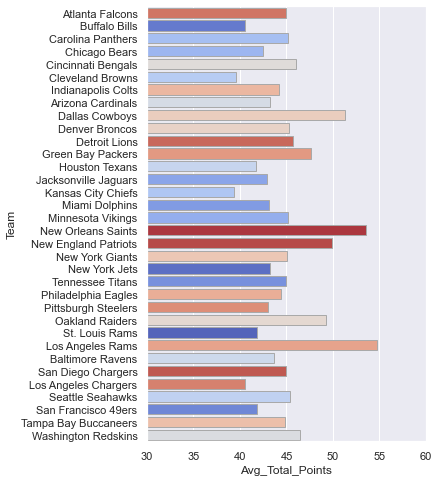

In [816]:
fig = plt.figure(figsize=(5,8))
_ = fig.add_subplot(1,1,1)
_ = plt.xlabel('Average Total Points')
_ = plt.ylabel('Team')
_ = plt.xlim(30,60)
category = list(by_home.index)
sns.set(font_scale=1.0)
sns.barplot(x=by_home['Avg_Total_Points'],y=category,edgecolor='darkgray',
            palette=colors_from_values(by_home['Passing_Rank'],'coolwarm_r'))
fig.show()
fig.savefig('plots/fig99.png')


In [789]:
by_home['Passing_Rank'].corr(by_home['Avg_Total_Points'])

-0.5210525886928965

In [790]:
by_home['Rushing_Rank'].corr(by_home['Avg_Total_Points'])

-0.006615500915268446

In [791]:
by_home['Total_Rank'].corr(by_home['Avg_Total_Points'])

-0.48376556276867017

In [794]:
by_home['Passing_Def_Rank'].corr(by_home['Avg_Total_Points'])

-0.4347977271282208

In [795]:
by_home['Rushing_Def_Rank'].corr(by_home['Avg_Total_Points'])

-0.003995185113021996

In [798]:
by_home['Defense_Rank'].corr(by_home['Avg_Total_Points'])

-0.3469432262707415

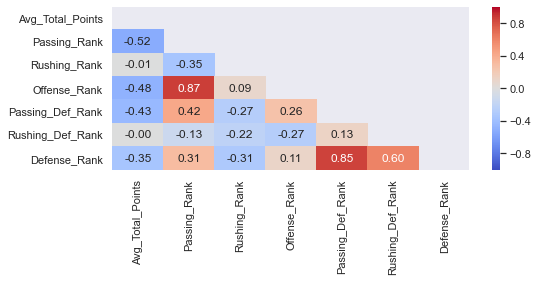

In [817]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1)

mask = np.triu(by_home.corr())
sns.heatmap(by_home.corr(),vmin=-1.0,center=0,vmax=1.0,mask=mask,
            cmap='coolwarm',annot=True,fmt='.2f')
fig.show()
fig.savefig('plots/fig98.png')

In [797]:
by_home

,Avg_Total_Points,Passing_Rank,Rushing_Rank,Offense_Rank,Passing_Def_Rank,Rushing_Def_Rank,Defense_Rank
Atlanta Falcons,44.968750,5.0,31.0,6.0,3.0,23.0,9.0
Buffalo Bills,40.536585,32.0,3.0,24.0,34.0,5.0,28.0
Carolina Panthers,45.193548,25.0,4.0,20.0,14.0,18.0,16.0
Chicago Bears,42.529412,26.0,20.0,27.0,23.0,20.0,24.0
Cincinnati Bengals,46.028571,17.0,27.0,25.0,21.0,4.0,12.0
Cleveland Browns,39.540541,23.0,29.0,29.0,27.0,1.0,15.0
Indianapolis Colts,44.171429,11.0,25.0,14.0,7.0,7.0,2.0
Arizona Cardinals,43.205882,19.0,34.0,32.0,15.0,21.0,19.0
Dallas Cowboys,51.342857,14.0,5.0,9.0,11.0,26.0,18.0
Denver Broncos,45.242424,15.0,17.0,17.0,32.0,24.0,30.0


In [827]:
avg_pts_week = by_week['Tot_Pts'].groupby(by_week['Week']).mean()
avg_temp_week = by_week['Temperature'].groupby(by_week['Week']).mean()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

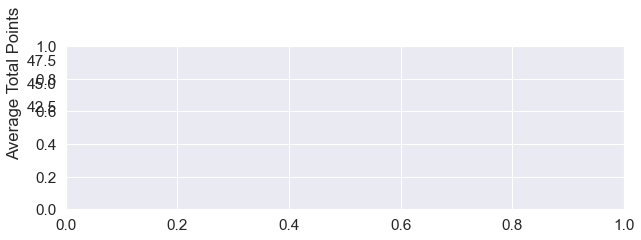

In [830]:
fig9 = plt.figure(figsize=(10,3))
_ = fig9.add_subplot(2,1,1)
_ = plt.xlabel('Week')
_ = plt.ylabel('Average Total Points')
_ = plt.ylim(41,49)
_ = plt.bar(avg_pts_week.index,avg_pts_week.values,color='green',
       tick_label=[str(i) for i in range(7,18)])
#ax2 = ax.twinx()
#ax2.set_ylabel('Temperature (°F)')
#ax2.set_ylim(50,70)
#ax2.plot(avg_temp_week.index,avg_temp_week.values,linewidth=1, color='blue')
_ = fig9.add_subplot(1,1,1)
_ = plt.bar()
fig9.tight_layout()  
fig9.show()

In [665]:
X_show['Tot_Pts'].corr(X_show['Temperature'])

0.060583849681406454

In [678]:
domed = X_show[X_show['dome' == 1]]
notdomed = X_show[X_show['dome' == 0]]

In [1187]:
X_show['Tot_Pts'].corr(X_show['dome'])

0.048973873004645986

In [724]:
temp = notdomed[['Tot_Pts','Temperature']]
#bins = [i for i in range(0,91,10)]
#bins.remove(10)
bins = [-10,30,40,50,60,70,80,100]
grouped = temp.groupby(pd.cut(temp.Temperature,bins))
ind = np.arange(len(grouped['Tot_Pts'].mean()))
print(grouped['Tot_Pts'].mean(),grouped['Tot_Pts'].count())
type(grouped['Tot_Pts'].mean())

Temperature
(-10, 30]    43.544118
(30, 40]     43.178808
(40, 50]     44.786325
(50, 60]     44.984043
(60, 70]     45.909836
(70, 80]     44.426667
(80, 100]    43.052632
Name: Tot_Pts, dtype: float64 Temperature
(-10, 30]    136
(30, 40]     151
(40, 50]     117
(50, 60]     188
(60, 70]     122
(70, 80]      75
(80, 100]     19
Name: Tot_Pts, dtype: int64


pandas.core.series.Series

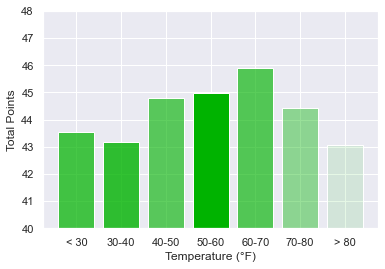

In [818]:
ind = np.arange(len(grouped['Tot_Pts'].mean()))
counts = grouped['Tot_Pts'].count().values
alp = counts/max(counts)
colors = [(0,0.7,0,alp[a]) for a in range(len(alp))]
_ = plt.bar(ind,grouped['Tot_Pts'].mean().values,color=colors)
_ = plt.xticks(ind,labels=('< 30','30-40','40-50','50-60','60-70','70-80','> 80'))
_ = plt.ylim(40,48)
_ = plt.xlabel('Temperature (°F)')
_ = plt.ylabel('Total Points')
plt.show()
fig.savefig('plots/fig97.png')

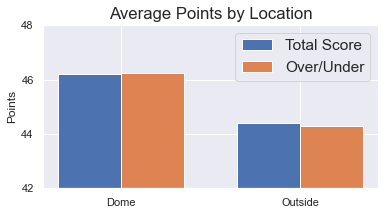

In [819]:
tpmean = (domed['Tot_Pts'].mean(), notdomed['Tot_Pts'].mean())
oumean = (domed['Over/Under'].mean(),notdomed['Over/Under'].mean())

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)

ind = np.arange(2)  # the x locations for the groups
width = 0.35  # the width of the bars

sns.set(font_scale=1.4)
_ = plt.bar(ind - width/2, tpmean, width, label='Total Score')
_ = plt.bar(ind + width/2, oumean, width, label='Over/Under')

# Add some text for labels, title and custom x-axis tick labels, etc.
_ = plt.ylabel('Points')
_ = plt.title('Average Points by Location')
_ = plt.xticks(ind,labels=('Dome','Outside'))
_ = plt.legend(loc='upper right')
_ = plt.ylim(42,48)
fig.show()
fig.savefig('plots/fig96.png')

In [673]:
d = [domed['Tot_Pts'].mean(),domed['Over/Under'].mean()]
nd = [notdomed['Tot_Pts'].mean(),notdomed['Over/Under'].mean()]
_ = fig9.add_subplot(2,1,1)
_ = plt.xlabel('Week')
_ = plt.ylabel('Average Total Points')
_ = plt.ylim(41,49)
_ = plt.bar(avg_pts_week.index,avg_pts_week.values,color='green',
       tick_label=[str(i) for i in range(6,18)])

,Home_Team,Vis_Team,H_Game,V_Game,Tot_Pts,Over/Under,H_Pts,H_Pts_Opp,V_Pts,V_Pts_Opp,...,Temperature,Wind,a_turf,astroplay,astroturf,fieldturf,grass,matrixturf,sportturf,Week
Code,,,,,,,,,,,,,,,,,,,,,
201311070min,Minnesota Vikings,Washington Redskins,34.0,27.0,61,48.0,22.000000,31.166667,26.000000,30.333333,...,70.0,0.0,0,0,0,0,0,0,1,10
201710290det,Detroit Lions,Pittsburgh Steelers,15.0,20.0,35,44.5,26.833333,24.833333,21.000000,16.333333,...,70.0,0.0,0,0,0,1,0,0,0,8
201512270det,Detroit Lions,San Francisco 49ers,32.0,17.0,49,42.0,25.500000,19.666667,15.500000,22.000000,...,70.0,0.0,0,0,0,1,0,0,0,16
201611240dal,Dallas Cowboys,Washington Redskins,31.0,26.0,57,53.0,30.666667,18.333333,25.833333,20.166667,...,70.0,0.0,0,0,0,0,0,1,0,12
201312290crd,Arizona Cardinals,San Francisco 49ers,20.0,23.0,43,41.0,28.666667,17.166667,26.000000,16.166667,...,70.0,0.0,0,0,0,0,1,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201412070crd,Arizona Cardinals,Kansas City Chiefs,17.0,14.0,31,41.0,19.666667,17.500000,22.500000,17.166667,...,70.0,0.0,0,0,0,0,1,0,0,14
201412210crd,Arizona Cardinals,Seattle Seahawks,6.0,35.0,41,36.0,15.833333,14.666667,22.833333,11.333333,...,70.0,0.0,0,0,0,0,1,0,0,16
201011070buf,Buffalo Bills,Chicago Bears,19.0,22.0,41,41.5,20.166667,32.666667,17.833333,16.666667,...,70.0,0.0,0,1,0,0,0,0,0,9


In [705]:
notdomed['Tot_Pts'].corr(notdomed['Temperature'])

0.04175134613588856

In [714]:
notdomed['Tot_Pts'].corr(notdomed['Temperature']**(0.5))

0.056523605587800195

In [703]:
test = notdomed[notdomed['Temperature']<65]
test['Tot_Pts'].corr(test['Temperature'])

0.06161124098270196

In [702]:
test = notdomed[notdomed['Temperature']>=65]
test['Tot_Pts'].corr(test['Temperature'])

-0.10142750464523927

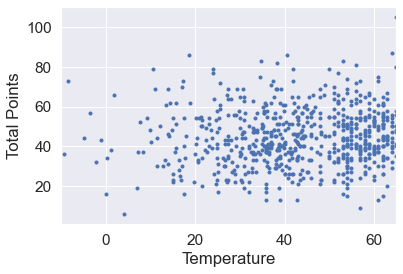

In [694]:
_ = plt.plot(notdomed['Temperature'],notdomed['Tot_Pts'],marker='.',linestyle="None")
_ = plt.xlim(-10,65)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Total Points')
plt.show()

In [382]:
X_show['Wind'].describe()

count    1098.000000
mean        6.310565
std         6.297769
min         0.000000
25%         0.000000
50%         6.000000
75%        10.000000
max        71.000000
Name: Wind, dtype: float64

In [664]:
X_show[X_show['Wind']==71]

,Home_Team,Vis_Team,H_Game,V_Game,Tot_Pts,Over/Under,H_Pts,H_Pts_Opp,V_Pts,V_Pts_Opp,...,Temperature,Wind,a_turf,astroplay,astroturf,fieldturf,grass,matrixturf,sportturf,Week
Code,,,,,,,,,,,,,,,,,,,,,
201612040pit,Pittsburgh Steelers,New York Giants,24.0,14.0,38,49.5,21.166667,21.5,23.666667,17.5,...,28.113559,71.0,0,0,0,0,1,0,0,13


In [1213]:
surf_cols=['a_turf','astroplay','fieldturf','grass','matrixturf','sportturf']
X_show['astroturf'] = 1-X_show[surf_cols].sum(axis=1)
surf_cols.append('astroturf')
surface = pd.concat([X_show[['Tot_Pts']],X_show[surf_cols]],axis=1)
by_surface = combine_dummies(surface,'surface',surf_cols)
avg_pts_surf=by_surface['Tot_Pts'].groupby(by_surface['surface']).mean()

In [1214]:
count_surf = by_surface['Tot_Pts'].groupby(by_surface['surface']).count()
count_surf

surface
a_turf         28
astroplay      18
astroturf      18
fieldturf     251
grass         575
matrixturf     26
sportturf      68
Name: Tot_Pts, dtype: int64

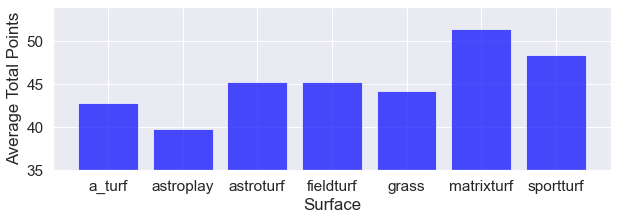

In [831]:
fig10 = plt.figure(figsize=(10,3))
ax = fig10.add_subplot(1,1,1)
ax.set_xlabel('Surface')
ax.set_ylabel('Average Total Points')
ax.set_ylim(35,54)
ax.bar(avg_pts_surf.index,avg_pts_surf.values,color='blue',alpha=0.7)
fig10.show()
fig.savefig('plots/fig95.png')

In [31]:
from scipy.stats import pearsonr

In [212]:
np.corrcoef(by_week['Tot_Pts'],by_week['Week'])

array([[ 1.       , -0.0648166],
       [-0.0648166,  1.       ]])

In [213]:
np.corrcoef(by_week['Tot_Pts'],by_week['Temperature'])

array([[1.        , 0.04835216],
       [0.04835216, 1.        ]])

In [235]:
np.corrcoef(by_week['Temperature'],by_week['Week'])

array([[ 1.        , -0.28474545],
       [-0.28474545,  1.        ]])

In [220]:
errored = pd.concat([error,X_show],axis=1).drop(['Tot_Pts','Over/Under'],axis=1)

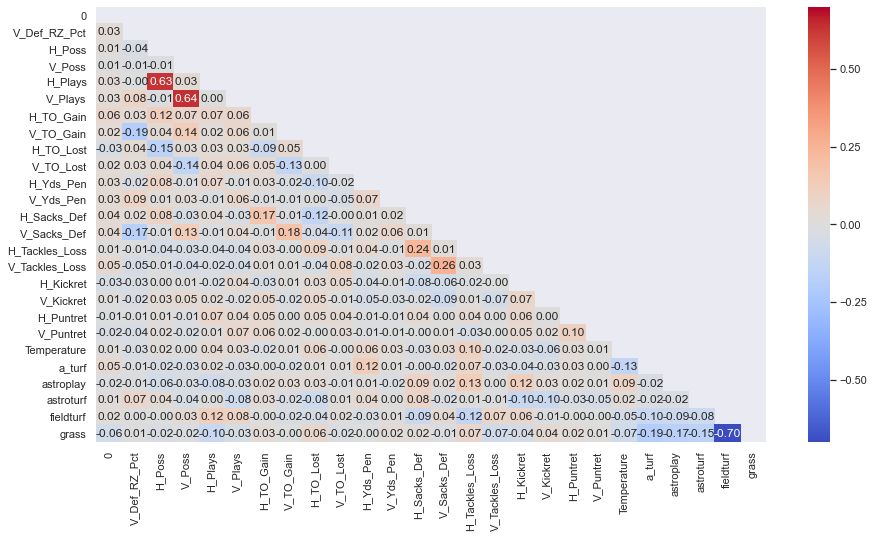

In [234]:
fig = plt.figure(figsize=(15,8))
_ = fig.add_subplot(1,1,1)
df = pd.concat([errored.iloc[:,0],errored.iloc[:,30:55]],axis=1)
sns.set(font_scale=1.0)
mask = np.triu(df.corr())
_ = sns.heatmap(df.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig.show()

In [1278]:
LR.intercept_

45.48882113821139